# Обучение нейронных сетей

В настоящее время используется несколько библиотек для глубокого обучения, например:
* Tensorflow (Google)
* PyTorch (Facebook)
* CNTK (Microsoft)
* MXNet (Apache)
* Caffe (Yangqing Jia) и Caffe 2 (Yangqing Jia, Facebook)
* Keras (Francois Chollet, Google)
* и другие.

Эти библиотеки позволяют представить нейронные сети (и другие вычисления) в виде вычислительных графов, соединяющих тензоры - многомерные массивы данных.

Наибольшей популярностью, видимо, пользуются Tensorflow и PyTorch. При этом Tensorflow имеет более развитые механизмы для внедрения и популярен на практике, в то время как PyTorch обладает большей гибкостью, что привело к росту его популярности в первую очередь среди исследователей, использующих его для реализации и проверки своих идей. Но это не значит, что Tensorflow не используют для экспериментов, а PyTorch - в продакшене. Оба фреймворка продолжают развиваться, и добавлять полезные свойства от конкурента.

Tensorflow обеспечивает низкоуровневые операции над тензорами:
* эффективные вычисления на CPU, GPU, или TPU (тензорные ускорители Google);
* автоматическое вычисление градиентов;
* мастабирование на параллельные системы, вплоть до суперкомпьютеров;
* экспорт вычислительных графов на внешние устройства, такие как обычные сервера, браузеры, мобильные и встроенные устройства.

Однако интерфейс Tensorflow является слишком низкоуровневым для непосредственной реализации на нём нейронных сетей. Для того, чтобы упростить работу с нейронными сетями, была создана библиотека Keras, которая обеспечивает удобный интерфейс для создания нейронных сетей и исходно могла использоваться с разными бэкендами тензорных вычислений - tensorflow, theano (разработка прекращена), СNTK, PyTorch. Начиная с Tensorflow 2.0, Keras вошла в состав Tensorflow, как её "официальный" интерфейс для создания нейронных сетей.

PyTorch содержит как низкоуровневые операции для работы с тензорами, так и высокоуровневый интерфейс для создания нейронных сетей, подобный Keras.

Описания и сравнения этих и других фреймворков для глубокого обучения могут быть найдены в интернете, например:

https://www.netguru.com/blog/deep-learning-frameworks-comparison

https://wiki.pathmind.com/comparison-frameworks-dl4j-tensorflow-pytorch

Рассмотрим создание нейронных сетей с использованием Keras.

In [10]:
import keras
import numpy as np

## Данные
Для экспериментов будем использовать традиционный набор данных MNIST - изображения рукописных цифр.
Этот набор данных, наряду с другими, входит в состав бибилиотеки Keras.
Откроем этот набор данных. В первый раз данные будут загружены из интернета.

Метод доступа к данным возвращает их сразу разделёнными на тестовую и обучающую выборки.

In [53]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Посмотрим, что представляют собой данные. Сначала размеры.

In [54]:
print(f'Обучающая выборка:\n x : {x_train.shape}, {x_train.dtype};  y: {y_train.shape}, {y_train.dtype}')
print(f'Контрольная выборка:\n x : {x_test.shape}, {x_test.dtype}; y: {y_test.shape},  {y_test.dtype}')

Обучающая выборка:
 x : (60000, 28, 28), uint8;  y: (60000,), uint8
Контрольная выборка:
 x : (10000, 28, 28), uint8; y: (10000,),  uint8


Итак, у нас есть 60000 примеров в обучающей выборке и 10000 в контрольной. Входы представляют собой матрицы размером 28х28, а на выходе - одно число.

### Классы
Сначала посмотрим на выходные значения - метки классов.

Обучающая выборка:
 Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})


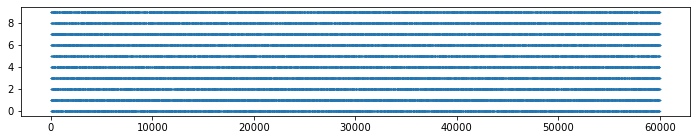

Проверочная выборка:
 Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892})


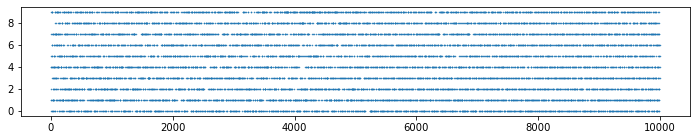

In [55]:
from collections import Counter

print('Обучающая выборка:\n', Counter(y_train))

fig, ax = plt.subplots(figsize=(12, 2))
ax.plot(y_train, linestyle='None', marker='.', markersize=1)
plt.show()

print('Проверочная выборка:\n', Counter(y_test))

fig, ax = plt.subplots(figsize=(12, 2))
ax.plot(y_test, linestyle='None', marker='.', markersize=1)
plt.show()

Можно констатировать, что как и должно быть, у нас есть 10 выходных классов, соответствующих цифрам от 0 до 9, все они достаточно равномерно представлены как в обучающем так и в тестовом наборе, и оба набора перемешаны.

In [56]:
num_classes = 10   #Пригодится для задания числа выходов нейронной сетии

При решении задач классификации, как правило, используют вариант, в котором для каждого класса есть свой выход сети, значение на котором соответствует вероятности принадлежности рассматриваемого объекта тому или иному классу.

Чтобы обучать такую сеть, нужно соответственно преобразовать выходные данные - используя one hot enconding. Для этого в keras есть специальная функция.

In [57]:
print('До преобразования:', y_train[:3], '...')
y_train = keras.utils.to_categorical(y_train, num_classes)
print('После преобразования:', y_train[:3], '...')

print('До преобразования:', y_test[:3], '...')
y_test = keras.utils.to_categorical(y_test, num_classes)
print('После преобразования:', y_test[:3], '...')

До преобразования: [5 0 4] ...
После преобразования: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] ...
До преобразования: [7 2 1] ...
После преобразования: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]] ...


### Входные изображения

Теперь посмотрим, на что похожи входные данные.

Пример 873:
Класс: 2
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  31  94 254 255 254 218 138
   14   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 131 234 253 253 253 253 253 253
  181  10   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 128 252 253 253 231 217 217 245 253
  253 185  12   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   9 202 253 233 126  26   0   0  51 209
  253 253  83   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  13 214 235  51   0   0   0   0   0  37
  246 253 212  29   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  54  

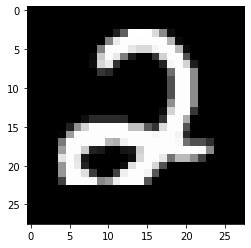

In [28]:
n = 873
print(f'Пример {n}:')
print(f'Класс: {y_train[n]}')
print(x_train[n])

plt.imshow(x_train[n], cmap="gray")

Каждый пример представляет собой битмап размером 28х28, в данном случае на нём нарисована цифра 2.

Тем не менее, нам потребуется сделать некоторую доработку. Слои нейронных сетей, рассчитанные на обработку картинок, предполагают, что им будут подавать на вход трехмерный тензор, третье измерение которого соответствует каналам изображения (красный, синий, зелёный для цветных изображений). Хотя у нас изображение в градациях серого (один канал), нам надо добавить соответствующую размерность данным, так, чтобы каждая картинка имела размер 28х28х1.

При этом, если используется Tensorflow, то измерение для каналов действительно должно быть последним (такой режим в Keras называют 'channels_last'), как написано в предыдущем абзаце, а вот Theano ожидает его первым, и размер должен быть 1х28х28 соответственно - режим 'channels_first'.

Узнать требуемый режим можно вот таким образом:

In [34]:
from keras import backend as K
K.image_data_format()

'channels_last'

Итак, у меня требуется формат channels_last: 28x28x1. Преобразуем данные:

In [59]:
img_rows=28
img_cols=28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# Если кто-то использует Theano, то преобразование должно быть таким:
#x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
#x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
#input_shape = (1, img_rows, img_cols)

x_train.shape

(60000, 28, 28, 1)

Мы просто добавили одно новое измерение размером один, которое привело наши картинки к ожидаемому для библиотек размеру без изменения данных.

Как мы видели, входные яркости изображения имеют диапазон 0...255. Однако для нейронных сетей лучше иметь диапазон 0..1 (или даже -1...1). Поделим данные на 255, чтобы сделать их более удобными для нейронной сети.

In [71]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## Нейронная сеть

Библиотека Keras предоставляет два варианта интерфейса для создания нейронных сетей:
* Functional API
* Model API

Functional API является более гибким вариантом. При его использовании модель строится как направленный ациклический граф, что на практике выливается в то, что мы создаём сеть слой за слоем, для каждого слоя указывая, какой из выходов предыдущих слоёв является его входом.

Слои определены в keras.layers, импортируем слои, которые нам пригодятся.

In [36]:
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, Flatten

Построение сети начинается с входного слоя.

In [72]:
inp = Input(shape=input_shape) # Входной слой, input_shape мы чуть раньше определили как 28x28x1

Теперь создадим свёрточный слой. Обратите внимание, что Convolution2D (с параметрами) возвращает функцию, которую мы применяем к inp - "выходу", который вернул нам предыдущий слой Input. Так задаётся структура нейронной сети в Functional API Keras. Внутри библиотека строит вычислительный граф, который будет проводить реальные расчёты.

In [73]:
filters = 32   # число фильтров в слое
kernel_size = (3, 3)   # размер фильтра
conv_1 = Convolution2D(filters, kernel_size, padding='same', activation='relu')(inp)

# padding = 'same' означает, что мы хотим использовать padding так, что размер изображения 28х28 сохранится после свёртки.
# activation = 'relu' выбирает функцию активации для слоя - ReLU
# По умолчанию для весов слоя используется случайная инициалиация методом Глорота и нули для смещения нейронов,
# другие методы инициализации можно задать параметрами kernel_initializer и bias_initializer соответственно.

Добавим ещё один свёрточный слой с такими же параметрами, а за ним слой концентрации (максимум по квадратикам 2х2):

In [74]:
conv_2 = Convolution2D(filters, kernel_size, padding='same', activation='relu')(conv_1)
pool_size = 2
pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)

Чтобы перейти от свёрточных слоёв к полносвязанным сначала используем Flatten(), который не делает никаких вычислений, а просто выполняет в нейронной сети операцию, эквивалентную rehaspe() или flatten() в numpy - представляет те данные из тензора в виде одномерного массива.

После Flatten() используем один полносвязанный слой Dense из 128 нейронов и на выходе сети поставим софтмакс слой с 10 выходами.


In [75]:
flat = Flatten()(pool_1)
hidden_size = 128
hidden = Dense(hidden_size, activation='relu')(flat) # Полносвязанный ReLU слой
out = Dense(num_classes, activation='softmax')(flat) 

Теперь надо "обернуть" готовую сеть в модель keras, для чего достаточно указать входной и выходной слои (их может быть несколько).

In [76]:
from keras.models import Model
model = Model(inputs=inp, outputs=out)

Чтобы сеть можно было обучать, надо указать, какой алгоритм оптимизации и функцию ошибки мы будем использовать. Можно также указать дополнительные метрики, которые будут выводится для информации. Например, метрика "точность" (число правильно классифицированных примеров), более понятно человеку, чем значения кросс-энтропии.

In [77]:
model.compile(loss='categorical_crossentropy', # используем функцию ошибки кросс-энтропии
              optimizer='adam', # используем алгоритм обучения Adam
              metrics=['accuracy']) # в качестве ошибки будет выводиться точность

In [78]:
batch_size = 200        # Размер пакета
num_epochs = 15         # число эпох обучения

data_step = 50          # Для ускорения процесса, и только в обучающих целях, будем использовать не все данные, а
                        # каждый 50-ый пример (в 50 раз меньше). Если Ваш компьютер достаточно быстр, поставьте тут 1.

history = model.fit(x_train[::data_step], y_train[::data_step], 
                    batch_size=batch_size, epochs=num_epochs,
                    verbose=1, validation_split=0.2) # ...откладываем 20% данных на проверку

Train on 960 samples, validate on 240 samples
Epoch 1/15
960/960 [==============================] - 15s 15ms/step - loss: 2.2043 - accuracy: 0.3125 - val_loss: 2.0322 - val_accuracy: 0.5333
Epoch 2/15
960/960 [==============================] - 12s 12ms/step - loss: 1.8352 - accuracy: 0.7010 - val_loss: 1.5434 - val_accuracy: 0.7417
Epoch 3/15
960/960 [==============================] - 11s 11ms/step - loss: 1.2871 - accuracy: 0.7688 - val_loss: 0.9522 - val_accuracy: 0.7958
Epoch 4/15
960/960 [==============================] - 12s 12ms/step - loss: 0.8076 - accuracy: 0.8042 - val_loss: 0.6154 - val_accuracy: 0.8167
Epoch 5/15
960/960 [==============================] - 11s 12ms/step - loss: 0.5842 - accuracy: 0.8208 - val_loss: 0.5427 - val_accuracy: 0.8417
Epoch 6/15
960/960 [==============================] - 11s 11ms/step - loss: 0.4891 - accuracy: 0.8510 - val_loss: 0.5037 - val_accuracy: 0.8417
Epoch 7/15
960/960 [==============================] - 11s 11ms/step - loss: 0.4310 - accur

Чтобы проследить за статистиками в процессе обучения, можно воспользоваться историей обучения, которую возвращает метод fit.
Внутри него есть словарь history, в котором можно найти историю по метрикам обучения.

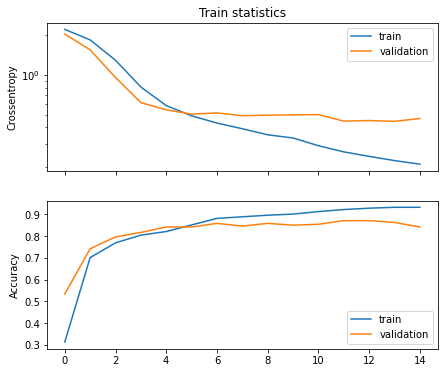

In [79]:
fig, ax = plt.subplots(nrows = 2, sharex=True, figsize=(7, 6))
ax[0].set_title('Train statistics')
ax[0].plot(history.history['loss'], label='train')
ax[0].plot(history.history['val_loss'], label='validation')
ax[0].set_ylabel('Crossentropy')
ax[0].legend()
ax[0].set_yscale('log')
ax[1].plot(history.history['accuracy'], label='train')
ax[1].plot(history.history['val_accuracy'], label='validation')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()

Похоже, у нас есть некоторое переобучение. Как с ним бороться - посмотрим в следующей серии.